# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [10]:

import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [7]:

samples = 100000
fraud = pd.read_csv('Fraud.csv').sample(n=samples, random_state=1)
print(fraud.head())

         step      type     amount    nameOrig  oldbalanceOrg  newbalanceOrig  \
6322570   688   CASH_IN   23557.12  C867750533        8059.00        31616.12   
3621196   274   PAYMENT    6236.13  C601099070           0.00            0.00   
1226256   133   PAYMENT   33981.87  C279540931       18745.72            0.00   
2803274   225  CASH_OUT  263006.42   C11675531       20072.00            0.00   
3201247   249  CASH_OUT  152013.74  C530649214       20765.00            0.00   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
6322570  C1026934669       169508.66       145951.53        0               0  
3621196   M701283411            0.00            0.00        0               0  
1226256   M577905776            0.00            0.00        0               0  
2803274   C529577791       390253.56       653259.98        0               0  
3201247  C1304175579       252719.19       404732.93        0               0  


In [8]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,243.229430,1.815534e+05,8.283566e+05,8.498642e+05,1.102745e+06,1.230714e+06,0.001240,0.0
std,142.711863,6.168152e+05,2.875843e+06,2.912484e+06,3.531001e+06,3.836813e+06,0.035192,0.0
min,1.000000,1.800000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,155.000000,1.344656e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,239.000000,7.550210e+04,1.466800e+04,0.000000e+00,1.315374e+05,2.163863e+05,0.000000,0.0
75%,335.000000,2.092775e+05,1.070410e+05,1.449728e+05,9.458267e+05,1.115200e+06,0.000000,0.0
max,742.000000,4.669816e+07,4.381886e+07,4.368662e+07,3.281945e+08,3.279981e+08,1.000000,0.0


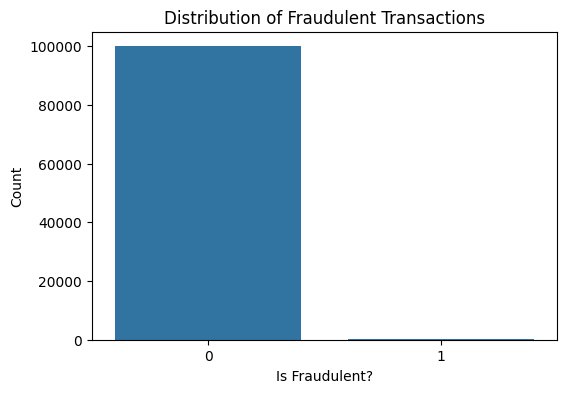

In [20]:
# Plot distribution of 'isFraud'

plt.figure(figsize=(6, 4))
sns.countplot(data=fraud, x='isFraud')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraudulent?')
plt.ylabel('Count')
plt.show()

### What is the distribution of the outcome? 

In [ ]:
"""The majority of the outcome is zeor meaning that they are not fraudulent."""

### Clean the dataset. Pre-process it to make it suitable for ML training. Feel free to explore, drop, encode, transform, etc. Whatever you feel will improve the model score.

In [22]:
fraud.info()


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 6322570 to 4679267
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 9.2+ MB


In [27]:

fraud = pd.get_dummies(fraud, columns=['type'], drop_first=True)

fraud.drop(columns=['nameOrig', 'nameDest'], inplace=True)



In [28]:
fraud.drop(columns=['step', 'isFlaggedFraud'], inplace=True)

In [31]:
missing_values = fraud.isnull().sum()
print(missing_values)

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64


In [33]:
X = fraud.drop(columns=['isFraud'])
y = fraud['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [34]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)



### Run a logisitc regression classifier and evaluate its accuracy.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(X_test_preprocessed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.99925


### Now pick a model of your choice and evaluate its accuracy.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_preprocessed, y_train)

y_pred_rf = rf_classifier.predict(X_test_preprocessed)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)


Random Forest Classifier Accuracy: 0.99945


### Which model worked better and how do you know?

In [2]:
 Random Forest Classifier achieved a slightly higher accuracy score of 0.99945

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.